<a href="https://colab.research.google.com/github/jatulya/deep-learning-intro/blob/master/14_sgd_bgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of Batch Gradient Descent and Stochaistic Gradient Descent

1. Import the necessary libraries

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

2. Import the csv file
3. Print the first few lines of the csv file to understand the nature of the data

In [3]:
df = pd.read_csv("homeprices_banglore.csv")
print(df.head())

   area  bedrooms   price
0  1056         2   39.07
1  2600         4  120.00
2  1440         3   62.00
3  1521         3   75.00
4  1200         2   51.00


From the data printed, it is clear that none of the values are scaled to 0-1, which is essential for a machine learning model.

We are using Min-Max scaler from scikit-learn's preprocessing module. It scales the value as -

```
X_scaled  = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
```

4. Import the Min-Max scaler.
5. Create two instances of the scaler - sx & sy - to use them seperately on scaling the x-axis(bedroom and area) and y-axis(prices)
6. As the parameter while scaling for x_axis, drop the column y_axis.
7. Reshape the column for sy

⚓  NOTE

▶ The reason why we are creating two instances of MinMaxScaaler is because *after fitting and transforming one set, the feature range (min and max values) of that particular dataset would be stored in it*, therefore using the same instance for transforming the next set can create incorrect scaling as the feature range would of the previous one.

▶ We are reshaping df[price] because *MinMaxScaler expects a 2D [nsamples, nfeatures]*. So our data column should look like [[price1], [price2], ..[priceN]] instead of [price1, price2..priceN].

In [24]:
from sklearn.preprocessing import MinMaxScaler
sx = MinMaxScaler()
sy = MinMaxScaler()

x_scaled = sx.fit_transform(df.drop('price', axis='columns'))
y_scaled = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))

print(f"Min of x_axis = {sx.data_min_} \tMax of x_axis = {sx.data_max_}")
print(f"Min of y_axis = {sy.data_min_} \t\t Max of y_axis = {sy.data_max_}")
print(f"X-scaled = {x_scaled[:5]}")
print(f"y-scaled = {y_scaled[:5]}")


Min of x_axis = [800.   1.] 	Max of x_axis = [3700.    5.]
Min of y_axis = [32.] 		 Max of y_axis = [167.]
X-scaled = [[0.08827586 0.25      ]
 [0.62068966 0.75      ]
 [0.22068966 0.5       ]
 [0.24862069 0.5       ]
 [0.13793103 0.25      ]]
y-scaled = [[0.05237037]
 [0.65185185]
 [0.22222222]
 [0.31851852]
 [0.14074074]]


8. Reshape y_scaled back to 1-D array.

In [7]:
y_scaled.reshape(df.shape[0])

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

The whole purpose of this linear regression model is to find the weights (coefficients) and bias in the linear eqaution -

```
price = w1*area + w2*bedrooms + bias
```

The weights are calculated using gradient descent for each epoch. Different types of gradient descent are -

*   Batch gradient descent
*   Stochaistic gradient descent
*   Mini batch gradient descent

9. Build batch gradient descent function.



# Batch gradient descent

Here, the whole training data is iterated and used for forward pass. Their values are predicted, errors are found and the cumulative errors is taken to adjust the weights for next epoch using derivatives.

Algorithm - batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01)

1. Get the number of features
2. Initialize a numpy array of dimension (1, number of features) filled with ones. This is the array for storing the weights.
```
w = np.ones(shape=(number of features))
```
3. Set bias, b = 0.
4. Store transpose of X in X_transpose.
5. Get the total number of samples.
6. Initialize two empty list - cost_list, epoch_list.
7. Repeat the following for epoch number of times -

  * find y-predicted.
   ```
   y_predicted = np.dot(X, w)
   ```
  * find the errors
   ```
   errors = y_true - y_predicted
   ```
  * find the derivates (no need to find seperate derivatives for both features because w is a numpy array. when calling .dot, the value will be stored separately).
  ```
   w_der = -(2/total_samples)*np.dot(X_transpose, errors)
   b_der = -(2/total_samples)*np.sum(errors)
   ```
  * find the new weights
  ```
  w = w - learning_rate*w_der
  b = b - learning_rate*b_der
  ```
  * Find the mean squared errors of the error
  ```
  cost = np.mean(np.square(errors))
  ```

In [17]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
  num_features = X.shape[1]
  total_samples = X.shape[0]
  X_transpose = X.T

  w = np.ones(shape=(num_features)) # w = [1,1]
  b = 0
  cost_list = []
  epoch_list = []

  for i in range (epochs):
    y_predicted = np.dot(w, X_transpose) + b
    errors = (y_true - y_predicted)

    w_der = -(2/total_samples)*np.dot(X_transpose, errors)
    b_der = -(2/total_samples)*np.sum(errors)
    w = w - learning_rate*w_der
    b = b - learning_rate*b_der

    cost = np.mean(np.square(errors))
    if i%10 == 0:
      if not i%50:
        print(f"Epoch = {i}, Cost = {cost}")
      cost_list.append(cost)
      epoch_list.append(i)

  return w, b, cost, cost_list, epoch_list


w.shape = (1,2)

X.shape = (20,2), X_transpose.shape = (2,20)

np.dot(X_transpose, w).shape = (1,20), y_true.shape = (1,20) ==> errors.shape = (1,20)

np.dot( X_transpose, errors).shape = (2,1) ==> assigned to w_transpose


In [37]:
weights, bias, cost, cost_list, epoch_list = batch_gradient_descent(x_scaled, y_scaled.reshape(y_scaled.shape[0]), 650)

Epoch = 0, Cost = 0.2768777174681
Epoch = 50, Cost = 0.03245122421764872
Epoch = 100, Cost = 0.015720331469182485
Epoch = 150, Cost = 0.013076793952344979
Epoch = 200, Cost = 0.011570105565415722
Epoch = 250, Cost = 0.010367745666240432
Epoch = 300, Cost = 0.009377471304274599
Epoch = 350, Cost = 0.008559203175573597
Epoch = 400, Cost = 0.007882169161242129
Epoch = 450, Cost = 0.007321219009066901
Epoch = 500, Cost = 0.006855698712269262
Epoch = 550, Cost = 0.006468640564624793
Epoch = 600, Cost = 0.006146104716070052


In [38]:
print(f"Weights = {weights}")
print(f"Bias = {bias}")
print(f"Cost = {cost}")

Weights = [0.68759496 0.64916921]
Bias = -0.20951898372793457
Cost = 0.005881571762777331


10. Plot the graph for cost v/s epoch

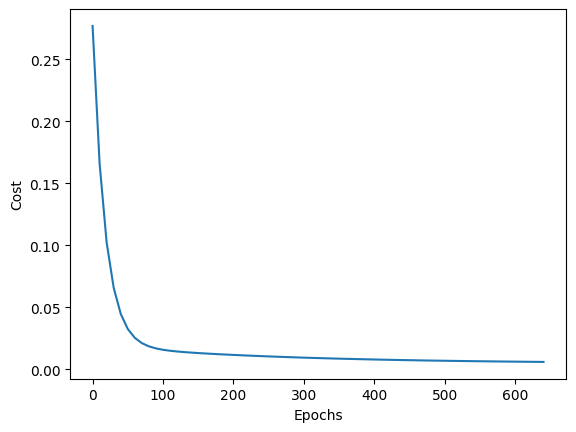

In [39]:
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(epoch_list, cost_list)


11. Predict using batch gradient descent.
    
    def predict(area,bedrooms,w,b):
    * Scale the values of area and bedroom using the earlier created MinMaxScaler instance.
    * here, w1 = w[0] , w2 = w[1] and bias is b
    * equation for price is w1*area + w2*bedrooms + bias
    * scaled_X[0] is area, scaled_X[1] is bedrooms
    ```
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    ```
    * once we get price prediction we need to to rescal it back to original value and also since it returns 2D array, to get single value we need to do value[0][0]



In [40]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]

print(predict(2600,4,weights,bias))
print(predict(1056,2,weights,bias))
print(predict(3700,5,weights,bias))

127.05903544252351
33.81863319875958
184.17810028400078


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# Stochastic Gradient Descent
Stochastic GD will use randomly picked single training sample to calculate error and using this error we backpropage to adjust weights


In [57]:
import random

def stochastic(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]

        y_predicted = np.dot(w, sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.square(sample_y-y_predicted)

        if i%1500==0:
            print(f"Epoch = {i}, Cost = {cost}")
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list


In [64]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic(x_scaled, y_scaled.reshape(y_scaled.shape[0]), 5000)
print(f"Weights = {w_sgd}")
print(f"Bias = {b_sgd}")
print(f"Cost = {cost_sgd}")

Epoch = 0, Cost = 0.4025683709869204
Epoch = 1500, Cost = 0.003310522153573819
Epoch = 3000, Cost = 0.00046306769678423795
Epoch = 4500, Cost = 0.008139063908695196
Weights = [0.76557829 0.73339525]
Bias = -0.2841308186872998
Cost = 0.0057670117815026576


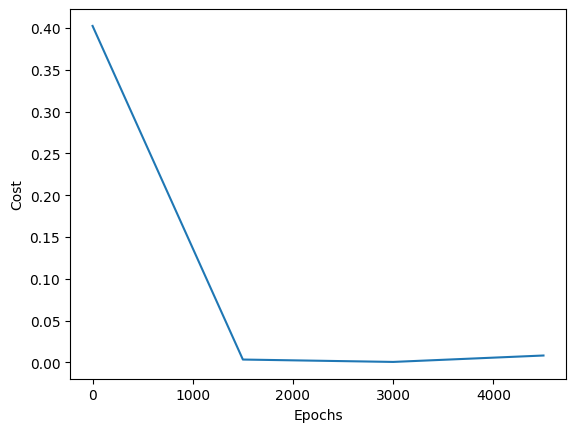

In [65]:
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [66]:
print(predict(2600,4,w_sgd,b_sgd))
print(predict(1056,2,w_sgd,b_sgd))
print(predict(3700,5,w_sgd,b_sgd))

132.0487894980374
27.518010545236223
196.00376742007415


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


#Mini Batch Gradient Descent
Mini-batch uses a small group (batch) of samples in each step.
This gives faster convergence and smoother updates.

It splits the dataset into small batches (e.g., 16, 32, 64 samples) and updates weights per batch. This gives you speed + stability.

Algorithm
* Initialize weights w and bias b

* For each epoch:

  - Shuffle the dataset

  - Split X and y into batches of size batch_size

  - For each batch:

    - Compute predictions

    - Calculate errors

    - Compute gradients (w_grad, b_grad)

    - Update w and b

  - compute and store cost

In [72]:
def mini_batch_gradient_descent(X, y_true, epochs, learning_rate=0.01, batch_size=32):
    num_features = X.shape[1]
    total_samples = X.shape[0]

    # Initialize weights and bias
    w = np.ones(num_features)
    b = 0

    cost_list = []
    epoch_list = []

    for epoch in range(epochs):
        indices = np.random.permutation(total_samples)
        X = X[indices]
        y_true = y_true[indices]

        for start in range(0, total_samples, batch_size):
            end = start + batch_size
            X_batch = X[start:end]
            y_batch = y_true[start:end]

            y_predicted = np.dot(w, X_batch.T) + b
            errors = (y_batch - y_predicted)

            # Compute gradients
            w_grad = -(2 / X_batch.shape[0]) * np.dot(X_batch.T, errors)
            b_grad = -(2 / X_batch.shape[0]) * np.sum(errors)

            # Update weights and bias
            w -= learning_rate * w_grad
            b -= learning_rate * b_grad

        # Compute cost after each epoch (on full data)
        y_full_pred = np.dot(X, w) + b
        full_errors = (y_true - y_full_pred).flatten()
        cost = np.mean(np.square(full_errors))

        if epoch % 10 == 0:
            if not epoch % 500:
                print(f"Epoch = {epoch}, Cost = {cost}")
            cost_list.append(cost)
            epoch_list.append(epoch)

    return w, b, cost, cost_list, epoch_list


In [73]:
w_mini, b_mini, cost_mini, cost_list_mini, epoch_list_mini = mini_batch_gradient_descent(x_scaled, y_scaled.reshape(y_scaled.shape[0]), 5000)
print(f"Weights = {w_mini}")
print(f"Bias = {b_mini}")
print(f"Cost = {cost_mini}")

Epoch = 0, Cost = 0.262766734572546
Epoch = 500, Cost = 0.006847239666048386
Epoch = 1000, Cost = 0.0048622941758576285
Epoch = 1500, Cost = 0.004394865589268953
Epoch = 2000, Cost = 0.0041651303492404885
Epoch = 2500, Cost = 0.00399057085319397
Epoch = 3000, Cost = 0.003842718466428163
Epoch = 3500, Cost = 0.0037150574471571094
Epoch = 4000, Cost = 0.003604482372263914
Epoch = 4500, Cost = 0.0035086575900759873
Weights = [0.75542854 0.41583882]
Bias = -0.11684836015389076
Cost = 0.00342576313997603


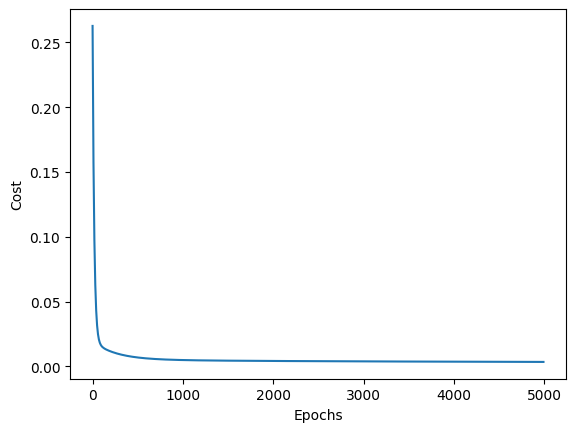

In [74]:
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(epoch_list_mini, cost_list_mini)

In [75]:
print(predict(2600,4,w_mini,b_mini))
print(predict(1056,2,w_mini,b_mini))
print(predict(3700,5,w_mini,b_mini))

121.62885338709971
39.26265570352688
174.34656455782965


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
